<h1 style='color: green;'><center>K-Means Clustering</center></h1>


# Overview
K-Means is one of the simplest and most popular unsupervised machine learning algorithms for clustering. The algorithm partitions a dataset into K distinct, non-overlapping subsets (clusters). The main idea is to define K centroids, one for each cluster, and assign each data point to the nearest centroid. The goal is to minimize the sum of the squared distances (WCSS) between each point and its assigned centroid.



Steps in K-Means:
1. Initialize: Select K random centroids.
2. Assignment: Assign each data point to the nearest centroid.
3. Update: Calculate new centroids by averaging the data points in each cluster.
4. Repeat: Repeat the assignment and update steps until the centroids no longer change significantly or a predefined number of iterations is reached.

Within-Cluster Sum of Squares (WCSS)<br>
- WCSS is the sum of the squared distances between each point and the centroid of the cluster it belongs to. The goal of K-Means is to minimize WCSS.

In [1]:
## Practical example of K-Mean Algorithm.

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

In [11]:
## Generate sample data.
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1, random_state=42)


In [7]:
## Apply K-Mean on this data

kmean=KMeans(n_clusters=4)
kmean.fit(X)
y_kmean = kmean.predict(X)



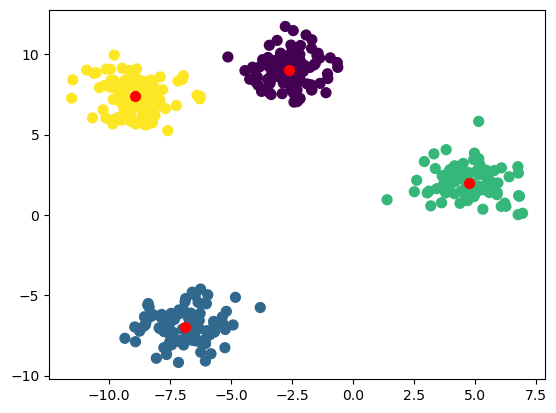

In [9]:
# Plot the results
plt.scatter(X[:,0], X[:,1], c=y_kmean, s=50, cmap='viridis')
centers = kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=1)
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Overview

DBSCAN is a powerful clustering algorithm that is particularly good at identifying clusters of arbitrary shapes and handling noise (outliers). It groups together points that are closely packed together, while marking points that lie alone in low-density regions as outliers.

Key Parameters:
- eps: The maximum distance between two samples for them to be considered as in the same neighborhood.
- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

Steps in DBSCAN:

1. Select an unvisited point and mark it as visited.
2. Find all neighbors within eps. If the number of neighbors is greater than min_samples, a cluster is formed.
3. Expand the cluster by recursively visiting neighbors.
4. Continue the process until all points are visited.

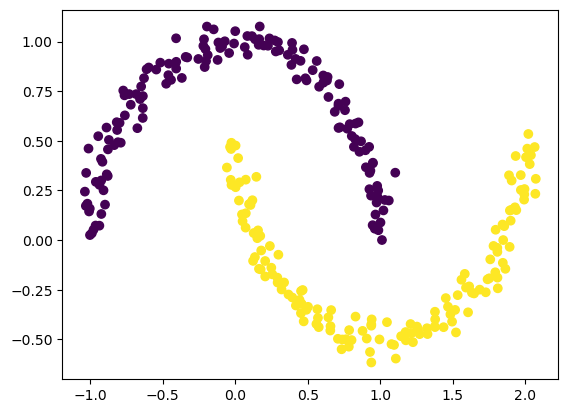

In [12]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_moons

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.05)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()


# Silhouette Score

Overview

The Silhouette Score is a metric used to evaluate the quality of a clustering algorithm. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1:

- 1: Perfect clustering
- 0: Overlapping clusters
- -1: Misclassified points

# Formula:
For a sample i:

- a(i): Average distance between i and all other points in the same cluster.
- b(i): Average distance between i and all points in the nearest cluster.

Silhouette Score= b(i)-a(i)/max(a(i),b(i))


In [13]:
from sklearn.metrics import silhouette_score

# Assume X is your data and labels are the cluster assignments
sil_score = silhouette_score(X, labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.3306329422326036


# Choosing the Optimal Number of Clusters using WCSS and the Elbow Method
Overview

The Elbow Method is used to determine the optimal number of clusters in a K-Means algorithm. The idea is to run K-Means for a range of values for K and calculate the WCSS for each value. As K increases, WCSS decreases, but after a certain point, the reduction in WCSS is marginal. This point, where the rate of decrease sharply slows down, is known as the "elbow," and represents the optimal number of clusters.



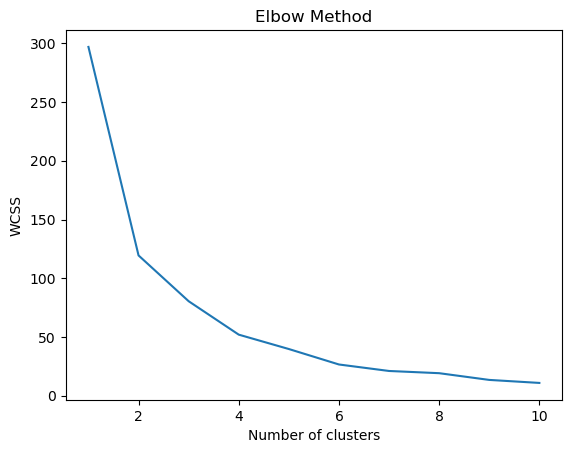

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


# Summary:

- K-Means: A fast, iterative algorithm that partitions data into K clusters by minimizing WCSS.
- DBSCAN: A density-based algorithm that identifies clusters of arbitrary shape and handles noise.
- Silhouette Score: A metric to evaluate clustering quality, considering both cohesion and separation.
- WCSS and Elbow Method: Used to find the optimal number of clusters in K-Means.

Understanding and practicing these algorithms using the provided Python examples will help you master clustering in machine learning.